### Unsupervised Algorthim (K - Means)

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

 


In [31]:
iris_df = pd.read_csv("Iris.csv")

In [32]:
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [33]:
iris_df = iris_df.loc[:, ['SepalLengthCm', 'PetalLengthCm']]

In [34]:
iris_df.head()

,SepalLengthCm,PetalLengthCm
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


In [35]:
iris_arr = iris_df.values

In [36]:
iris_arr

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.5],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

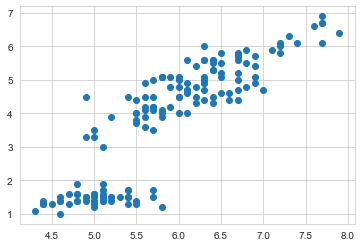

In [37]:
plt.scatter(iris_arr[:,0],iris_arr[:,1] )
plt.show()

In [38]:
def initialize_centroids(k):
    centroids = iris_df.sample(n=k).values
    return centroids
    

In [39]:
def calculate_distance(centroid_1,centroid_2 , row_1,row_2):
    d = np.sqrt((centroid_1 - row_1)**2 + (centroid_2 - row_2)**2)
    return d
    

In [40]:
def k_means(data_set,k):
    
    difference = 1
    
    cluster = np.zeros(data_set.shape[0])
    
    centroids = initialize_centroids(k)
    
    while difference:
        for i, row in enumerate(data_set):
            mini_distance = float('inf')
            for idx,centroid in enumerate(centroids):
                dist = calculate_distance(centroid[0], centroid[1],row[0],row[1])
                if mini_distance > dist:
                    mini_distance = dist
                    cluster[i] = idx
                    
        new_centriods = pd.DataFrame(data_set).groupby(by = cluster).mean().values
        
        if np.count_nonzero(centroids-new_centriods) == 0:
            difference = 0
        else:
            centroids = new_centriods
    
    return centroids,cluster        
    

In [41]:
def calculate_distortion(data, centroids , cluster):
    sum = 0
    for i , val in enumerate(data):
        sum += (centroids[int(cluster[i]), 0]-val[0])**2 +(centroids[int(cluster[i]), 1]-val[1])**2
    return sum
    

In [42]:
cost_list = []
for k in range(1, 10):
    centroids, cluster = k_means(iris_arr, k)
    cost = calculate_distortion(iris_arr ,centroids, cluster)
    cost_list.append(cost)

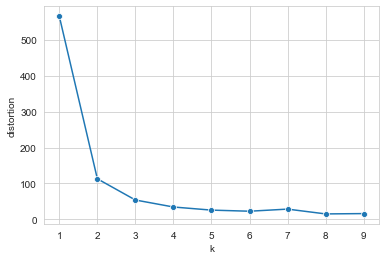

In [43]:
sns.lineplot(x=range(1,10), y=cost_list, marker='o')
plt.xlabel('k')
plt.ylabel('distortion')
plt.show()

In [44]:
k = 4
centroids, clusterr = k_means(iris_arr, k)

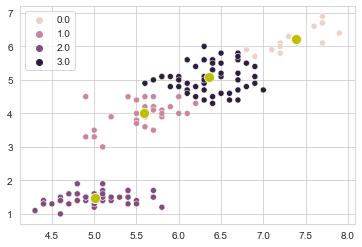

In [45]:
sns.scatterplot(iris_arr[:,0], iris_arr[:, 1], hue=clusterr)
sns.scatterplot(centroids[:,0], centroids[:, 1], s=100, color='y')
plt.show()
